# Erro Analysis of in situ Sea Surface Temperature Data

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from scipy import stats
from statsmodels.stats import weightstats as stests
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Ships (SH) 

## Read Data

In [2]:
# SH is represented by commericial research, and government-operated ships.
SH = pd.read_csv("SH_MQPF2.csv", header = None)

In [3]:
# set up column names
columns_name = ['YR',  'MO', 'DY', 'HR', 'LAT', 'LON', 
                'ISST', 'OSST', 'OERR', 'SI','ICflag', 'DS', 'VS', 'WDIR',
                'WSPD',  'SLP', 'AT','WBT',  'DPT', 'CLT', 'CLL']

In [4]:
SH.columns = columns_name
SH.head()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
0,1992,8,9,6,36.5,358.5,26.0,24.90,0.42,1.0,...,2.0,5.0,250.0,11.8,1015.0,23.5,21.0,19.6,0.0,0.0
1,1992,8,10,6,37.4,9.4,27.0,26.40,0.34,1.0,...,2.0,5.0,300.0,5.1,1017.6,26.1,23.6,22.4,3.0,1.0
2,1992,8,11,6,34.8,19.9,28.0,27.21,0.28,1.0,...,2.0,5.0,330.0,5.1,1014.0,26.5,24.5,23.6,0.0,0.0
3,1992,8,11,12,34.4,21.4,27.0,26.34,0.31,1.0,...,2.0,5.0,320.0,4.6,1013.3,27.2,25.1,24.2,3.0,3.0
4,1992,8,12,6,32.3,29.5,27.0,26.15,0.22,1.0,...,2.0,5.0,330.0,2.6,1009.7,25.2,23.8,23.2,2.0,2.0


In [5]:
# show data stats
SH.describe()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
count,9079.000000,9079.000000,9079.000000,9079.000000,9079.000000,9079.000000,9079.000000,9057.000000,9057.000000,8967.000000,...,9068.000000,9070.000000,9068.000000,9054.000000,9064.000000,9072.000000,9013.000000,9065.000000,9020.000000,8266.000000
mean,1998.511620,6.660645,15.777288,8.907919,24.674028,137.906245,22.650622,22.972744,0.296476,2.265752,...,4.087450,4.775744,208.407587,6.570444,1012.628729,22.137368,19.301387,17.404391,4.422838,3.689209
std,4.088557,3.457886,8.925629,6.700556,14.394184,107.606855,6.731815,6.685727,0.131656,1.213065,...,2.194915,0.733390,116.436225,4.284800,7.155338,7.337363,6.728195,7.386124,2.956822,2.776720
min,1992.000000,1.000000,1.000000,0.000000,-39.200000,0.000000,-11.100000,-1.800000,0.120000,0.000000,...,0.000000,0.000000,10.000000,0.000000,964.700000,-11.100000,-11.100000,-11.200000,0.000000,0.000000
25%,1995.000000,4.000000,8.000000,0.000000,11.000000,55.000000,17.500000,17.740000,0.210000,1.000000,...,2.000000,5.000000,90.000000,3.600000,1008.600000,16.800000,14.300000,12.200000,2.000000,1.000000
50%,1998.000000,7.000000,16.000000,6.000000,25.000000,106.700000,25.200000,25.530000,0.260000,3.000000,...,4.000000,5.000000,230.000000,5.100000,1011.700000,24.900000,21.800000,19.900000,5.000000,3.000000
75%,2002.000000,10.000000,24.000000,12.000000,37.000000,210.450000,28.000000,28.460000,0.340000,3.000000,...,6.000000,5.000000,310.000000,9.300000,1016.600000,27.800000,24.700000,23.300000,7.000000,6.000000
max,2007.000000,12.000000,31.000000,21.000000,73.100000,359.900000,48.400000,33.040000,1.600000,9.000000,...,9.000000,9.000000,362.000000,72.000000,1039.400000,37.400000,59.700000,60.100000,9.000000,9.000000


In [6]:
SH['YR'].value_counts().sort_index(ascending=True)

1992    242
1993    836
1994    678
1995    834
1996    800
1997    846
1998    752
1999    601
2000    352
2001    799
2002    613
2003    342
2004    340
2005    462
2006    439
2007    143
Name: YR, dtype: int64

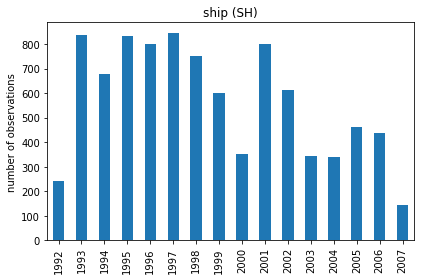

In [7]:
SH['YR'].value_counts().sort_index(ascending=True).plot(kind='bar') 
plt.title('ship (SH)')
plt.ylabel('number of observations')
plt.tight_layout()

The SH data contain the year from 1992 to 2007. 
Base on the graph, we can see each year contain how many observations.

## Ship tracks in different years

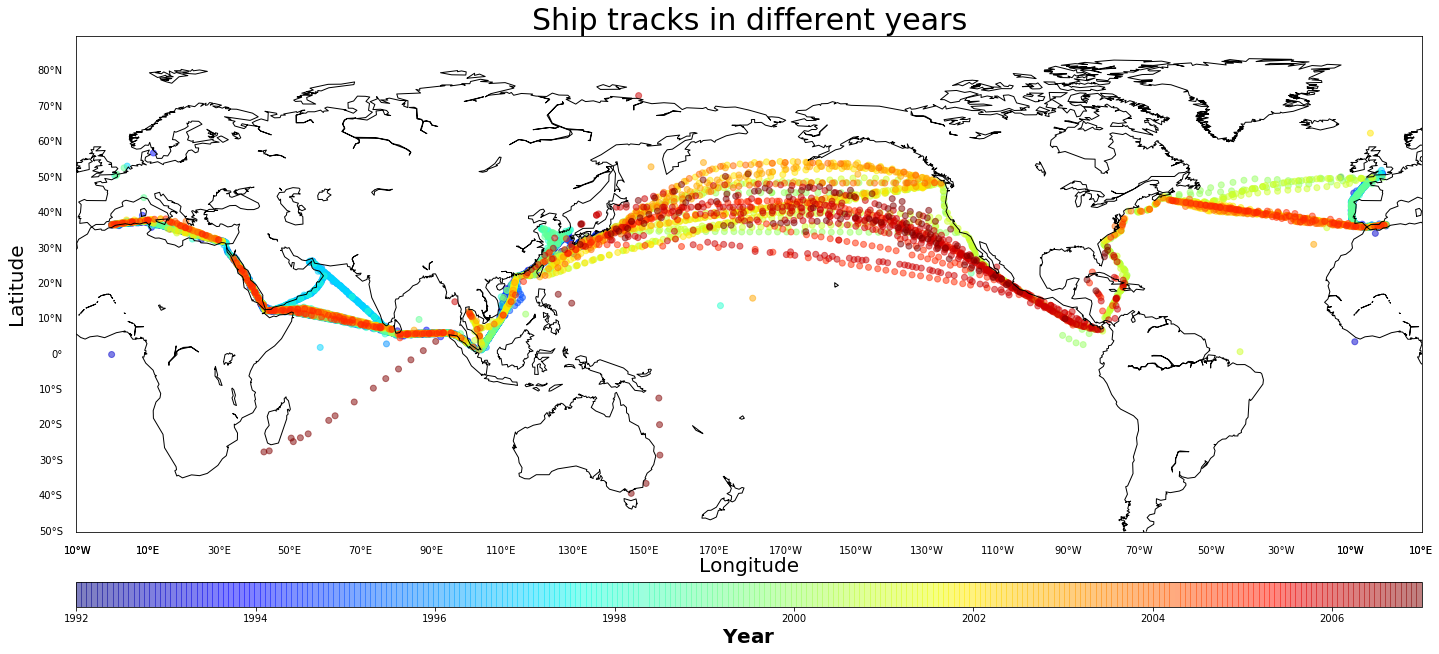

In [8]:
# set figure size
fig = plt.figure(figsize=(20, 30))

# call basemap function, lowest lat, lon and highest lat, lon
m = Basemap(llcrnrlat=-50,urcrnrlat=90, llcrnrlon=-10,urcrnrlon=370)

# draw lines
m.drawcoastlines()

# draw scatter plot
m.scatter(SH.LON, SH.LAT, c=SH.YR, cmap='jet', alpha=0.5)

# set up colorbar location, label
m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'Year' "}$", size=20)

# set the x, y labels with linewideth = 0
m.drawparallels(np.arange(-50,90,10),labels=[1,0,0,0], linewidth=0.0)
m.drawmeridians(np.arange(-10, 370,20),labels=[0,0,0,1], linewidth=0.0)

plt.title('Ship tracks in different years', size = 30)
plt.xlabel('Longitude', size =20, labelpad=25)
plt.ylabel('Latitude', size = 20, labelpad=50)

plt.tight_layout()

Map the data point by LON, LAT, to see SH data distribution.
Color data points by year.

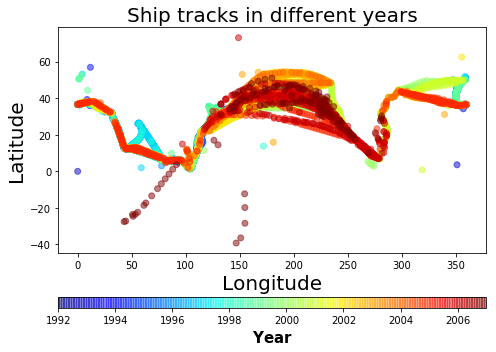

In [9]:
fig = plt.figure(figsize=(7, 5))

plt.scatter(SH.LON, SH.LAT, c=SH.YR,  cmap='jet', alpha=0.5)

m.colorbar(location='bottom', pad = 0.6).set_label(r"$\bf{" 'Year' "}$", size=15)

plt.title('Ship tracks in different years', size = 20)
plt.xlabel('Longitude', size =20)
plt.ylabel('Latitude', size = 20)

plt.tight_layout()

Map the data by long and lat of the ship, color indicates calendar years of SST observations. Create a scatter plot for a better understanding of the range of long and lat in the data.

## SST on ship tracks

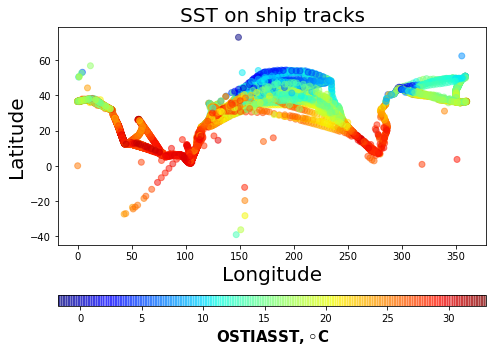

In [10]:
fig = plt.figure(figsize=(7, 5))
plt.scatter(SH.LON, SH.LAT, c=SH.OSST, cmap='jet', alpha=0.5)

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'OSTIA SST, ◦C' "}$", size=15)

plt.title('SST on ship tracks', size = 20)
plt.xlabel('Longitude', size =20)
plt.ylabel('Latitude', size = 20)

plt.tight_layout()

Map the data point by LON, LAT, to see SH data distribution. Color data points by OSST.

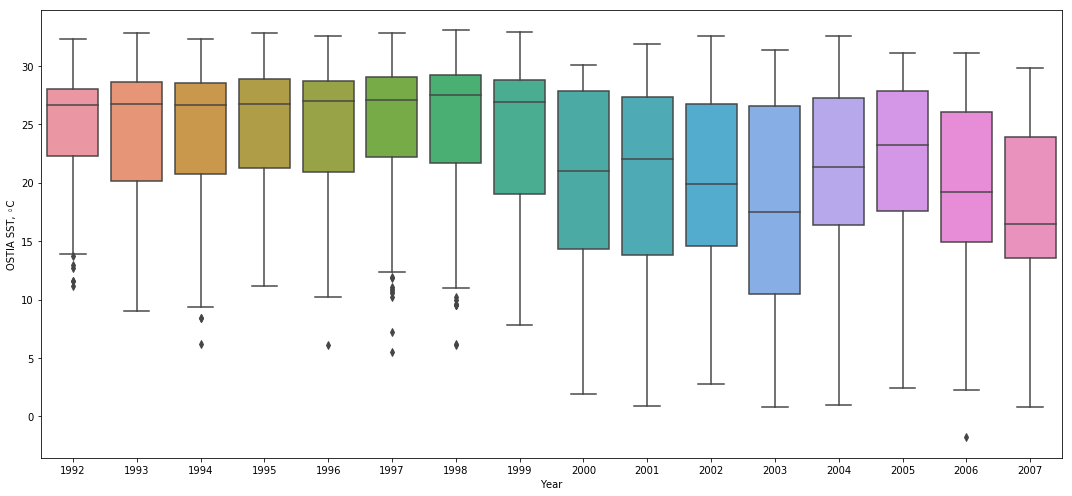

In [11]:
fig = plt.figure(figsize=(15, 7))
sns.boxplot(x="YR", y="OSST",data=SH)
plt.ylabel('OSTIA SST, ◦C')
plt.xlabel('Year')
plt.tight_layout()

Map the data by long and lat of the ship, but for OSTIA SST, ◦C, indicated by color. Create box plot separate data by years, and it can see max, median, min of OSSTIA SST for each year, and the year with outliers.

## SST error on ship tracks

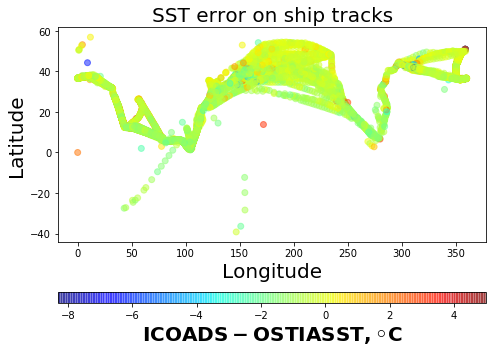

In [12]:
fig = plt.figure(figsize=(7, 5))

plt.scatter(SH.LON[SH.ICflag == 1], SH.LAT[SH.ICflag == 1], c=SH.ISST[SH.ICflag == 1] - SH.OSST[SH.ICflag == 1], cmap='jet', alpha=0.5)

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'ICOADS - OSTIA SST,◦C' "}$", size=20)

plt.title("SST error on ship tracks", size = 20)
plt.xlabel('Longitude', size =20)
plt.ylabel('Latitude', size = 20)

plt.tight_layout()

Map the data point by LON, LAT, to see SH data distribution. Color data points by ISST - OSST, and ICflag =1, which means pass quality check.

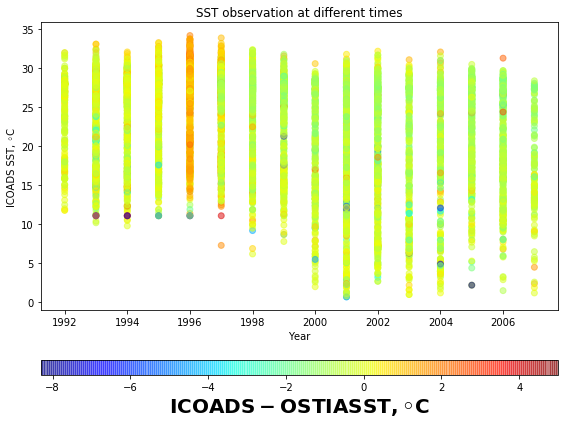

In [13]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(SH.YR[SH.ICflag == 1], SH.ISST[SH.ICflag == 1], 
            c=(SH.ISST[SH.ICflag == 1] - SH.OSST[SH.ICflag == 1]), 
            cmap='jet', alpha = 0.5)
plt.ylabel('ICOADS SST, ◦C')
plt.xlabel('Year')
plt.title('SST observation at different times')

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'ICOADS-OSTIA SST, ◦C' "}$", size=20)
plt.tight_layout()

sactter plot, plot the data point by Year, ISST, to see difference between each year. Color data points by ISST - OSST, and ICflag =1, which means pass quality check.

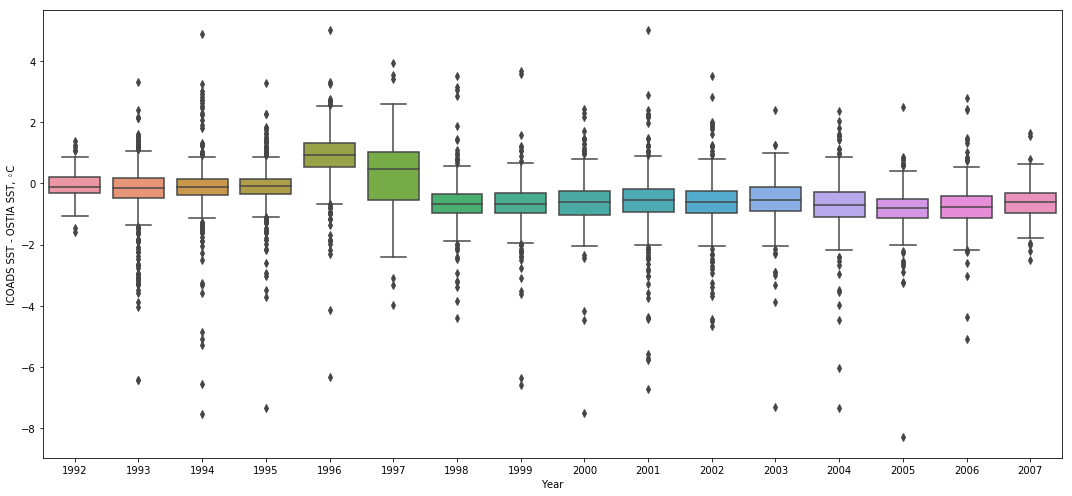

In [14]:
fig = plt.figure(figsize=(15, 7))
sns.boxplot(SH.YR[SH.ICflag == 1], SH.ISST[SH.ICflag == 1]-SH.OSST[SH.ICflag == 1])
plt.ylabel('ICOADS SST - OSTIA SST, ◦C')
plt.xlabel('Year')
plt.tight_layout()

Map Data by Difference between ISST AND OSST. 
The color indicates the difference (in ◦C) between ICOADS SST observations and the OSTIA analyzed SST values for the same days, and where the ICOADS observations were taken. 
ICOADS SST values should pass its QC, which means ICflag= 1. 
Base on the scatter plots, we can see the difference is mostly at the range from  -2 to 2. 
On the boxplot, we can see the Year 1996 contain high mean, max, and min compare to the other years.

## SST error on ship tracks with different SI

In [15]:
SH['SI'].unique()

array([ 1.,  3.,  9., nan,  0.])

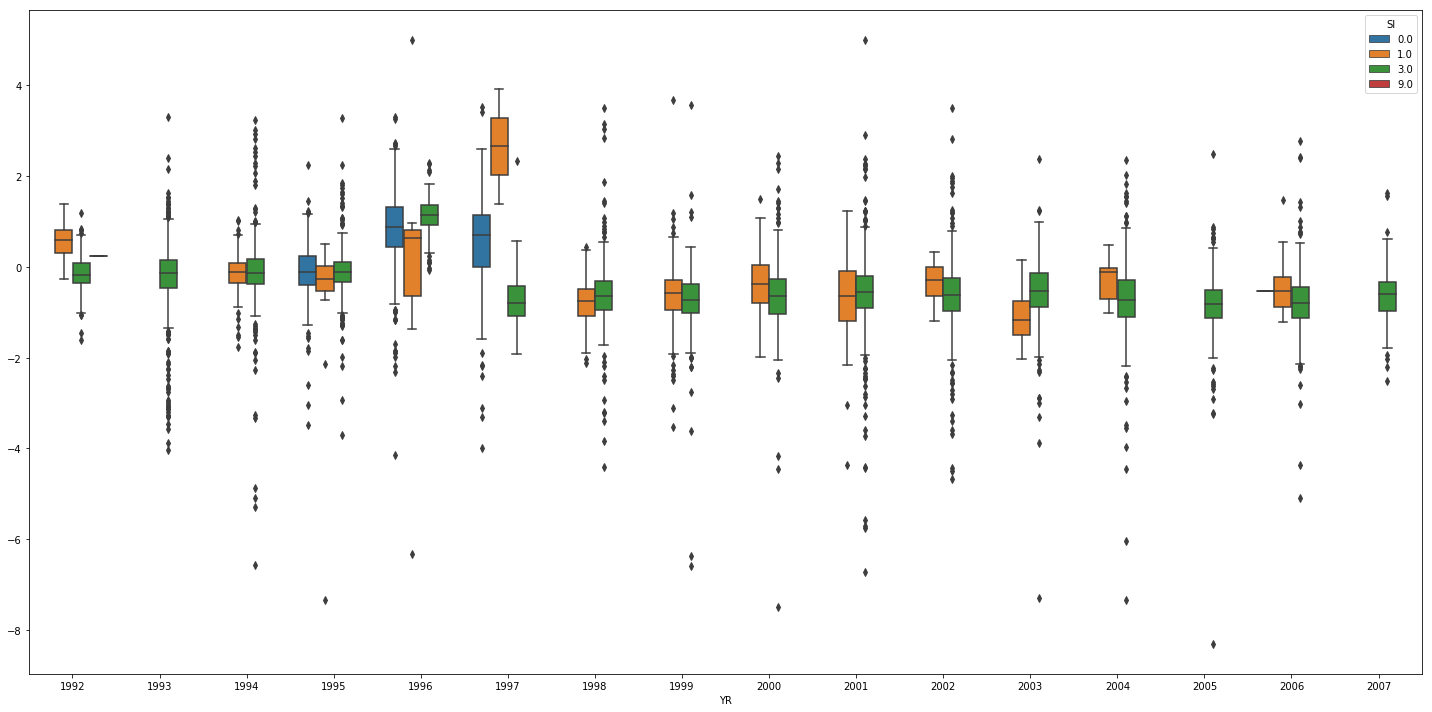

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=SH.YR[SH.ICflag == 1], y= SH.ISST[SH.ICflag == 1] - SH.OSST[SH.ICflag == 1], hue=SH.SI)
plt.tight_layout()

use box plot, plot the data point by Year, ISST - OSST, to see difference between each year and each SI(measure method). ICflag =1, which means pass quality check.

In [17]:
print("SH data contain",SH.OERR[(SH.SI == 1) & (SH.ICflag == 1)].count(),"observations using condense inlet measurment method, error mean is",
      round((SH.ISST[(SH.SI == 1) & (SH.ICflag == 1)] - SH.OSST[(SH.SI == 1) & (SH.ICflag == 1)]).mean(),2))

print("SH data contain",SH.OERR[(SH.SI == 3) & (SH.ICflag == 1)].count(),"observations using hull contact sensor measurment method, error mean is",
      round((SH.ISST[(SH.SI == 3) & (SH.ICflag == 1)] - SH.OSST[(SH.SI == 3) & (SH.ICflag == 1)]).mean(),2))

print("SH data contain",SH.OERR[(SH.SI == 9) & (SH.ICflag == 1)].count(),"observations using unknown or non-bucket measurment method, error mean is",
      round((SH.ISST[(SH.SI == 9) & (SH.ICflag == 1)] - SH.OSST[(SH.SI == 9) & (SH.ICflag == 1)]).mean(),2))

print("SH data contain",SH.OERR[(SH.SI == 0) & (SH.ICflag == 1)].count(),"observations using unknown or bucket method, error mean is",
      round((SH.ISST[(SH.SI == 0) & (SH.ICflag == 1)] - SH.OSST[(SH.SI == 0) & (SH.ICflag == 1)]).mean(),2))

SH data contain 886 observations using condense inlet measurment method, error mean is -0.51
SH data contain 6451 observations using hull contact sensor measurment method, error mean is -0.46
SH data contain 1 observations using unknown or non-bucket measurment method, error mean is 0.24
SH data contain 1598 observations using unknown or bucket method, error mean is 0.54


SI (column 10) indicates, for ship SST data, which measurement method was used. For my data contain 0, 1, 3, 9 four measurement methods. which is 0 – bucket, 1 – condenser inlet (intake), 3 – hull contact sensor, 9 – unknown or non-bucket. The idea is does measurement method affect the difference (in ◦C) between ICOADS SST observations and the OSTIA analyzed SST values? From, basic analysis, condense inlet and hull contact sensor measurement method contain a negative mean of error,  which means these two method overpredict. and observations using unknown or bucket method, contain a positive mean of error, which means the values predicted by this method are underpredicted. also, my data only have one sample of observation using non-bucket measurement method, so I just ignore it.

## Buliding Linear Regression

In [18]:
# check missing value
SH.isnull().sum()

YR          0
MO          0
DY          0
HR          0
LAT         0
LON         0
ISST        0
OSST       22
OERR       22
SI        112
ICflag      0
DS         11
VS          9
WDIR       11
WSPD       25
SLP        15
AT          7
WBT        66
DPT        14
CLT        59
CLL       813
dtype: int64

In [19]:
# drop missing value
SH.dropna(inplace=True)

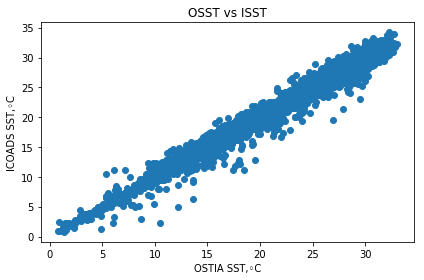

In [20]:
plt.scatter(SH['OSST'][SH.ICflag == 1], SH['ISST'][SH.ICflag == 1])
plt.xlabel('OSTIA SST,◦C')
plt.ylabel('ICOADS SST,◦C')
plt.title('OSST vs ISST')
plt.tight_layout()

Base on the scatter plot, OSST and ISST contain positive correlation, so linear regression would apply it.

In [21]:
# filter out data with ICflag = 1
df = SH[SH.ICflag == 1]

In [22]:
# set x = OSST
X = df['OSST']
# set target varible, ISST
y = df['ISST']
# build regression model
model = ols('y ~ X', df).fit()
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.379e+05
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:53:19   Log-Likelihood:                -10492.
No. Observations:                8059   AIC:                         2.099e+04
Df Residuals:                    8057   BIC:                         2.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0168      0.036      0.471      0.6

The coefficient of 0.9869 means that as the OSST variable increases by 1, the predicted value of ISST increases by 0.9869.

In [23]:
(df.ISST-df.OSST).describe()

count    8059.000000
mean       -0.285354
std         0.893843
min        -8.300000
25%        -0.800000
50%        -0.330000
75%         0.130000
max         5.000000
dtype: float64

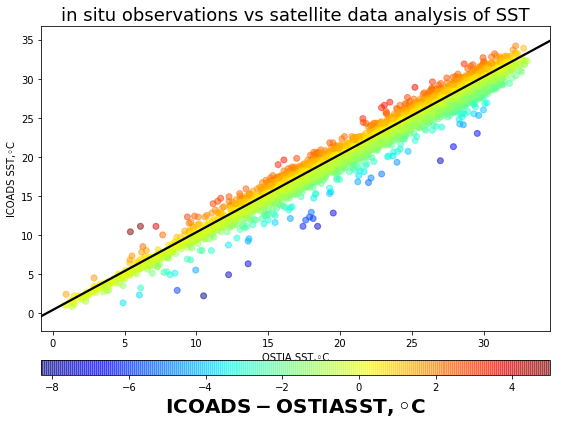

In [24]:
fig = plt.figure(figsize=(8, 6))
point = plt.scatter(X, y, c= df.ISST - df.OSST, 
            cmap='jet', alpha = 0.5)

sns.regplot(y, X, scatter=False, color='black')

plt.title('in situ observations vs satellite data analysis of SST', size = 18)
plt.xlabel('OSTIA SST,◦C')
plt.ylabel('ICOADS SST,◦C')

m.colorbar(location='bottom', pad = 0.4).set_label(r"$\bf{" 'ICOADS-OSTIA SST,◦C' "}$", size=20)
plt.tight_layout()

Plot data and a linear regression model fit.
The color indicates the difference between ISST - OSST.
Base on the graph, we can see the number of differences above 0 is less than the difference less than 0. for the most observations, the difference is between 0 to -4.

/Users/haonanou/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


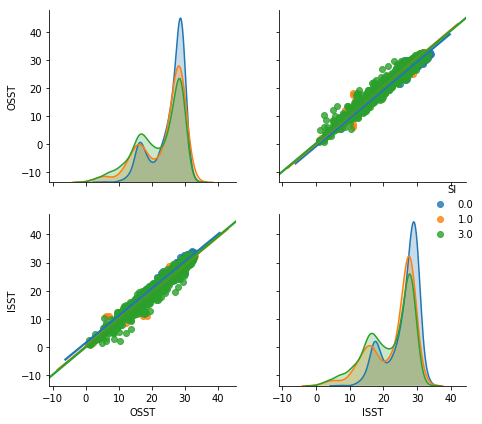

In [25]:
sns.pairplot(df, vars=['OSST', 'ISST'],kind='reg', hue= 'SI',  size=3)
plt.tight_layout()

method 0 measure high OSST and higher ISST compare to others. 
And most obervations use method 3, which is 3 – hull contact sensor.
I decide to separate SH data into 3 data to see what is change base on the regression model.

### Data use unknown or bucket method, SI = 0

In [26]:
unknown= df[df.SI == 0]

In [27]:
model = ols('ISST ~ OSST', unknown ).fit()
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ISST   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 4.323e+04
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:53:23   Log-Likelihood:                -1781.7
No. Observations:                1424   AIC:                             3567.
Df Residuals:                    1422   BIC:                             3578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5256      0.120     12.723      0.0

The coefficient of 0.9607 means that as the OSST variable increases by 1, the predicted value of ISST increases by 0.9607. R-squared is 0.968.

In [28]:
(unknown.ISST-unknown.OSST).describe()

count    1424.000000
mean        0.523462
std         0.867151
min        -4.140000
25%        -0.030000
50%         0.650000
75%         1.090000
max         3.530000
dtype: float64

max of differernce is 3.53, min is -4.14, mean is -0.52.

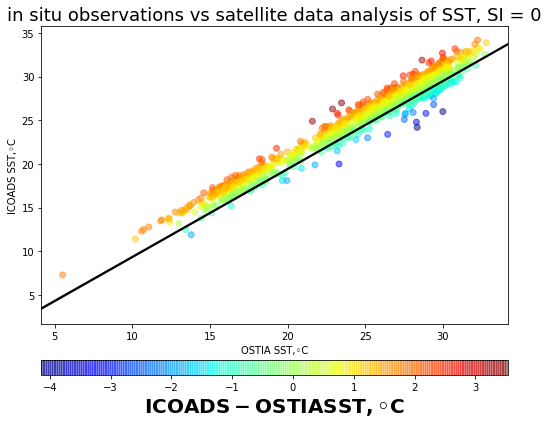

In [29]:
fig = plt.figure(figsize=(8, 6))
point = plt.scatter(unknown.OSST, unknown.ISST, c= unknown.ISST - unknown.OSST , 
            cmap='jet', alpha = 0.5)

sns.regplot(unknown.ISST, unknown.OSST, scatter=False, color='black')

plt.title('in situ observations vs satellite data analysis of SST, SI = 0', size = 18)
plt.xlabel('OSTIA SST,◦C')
plt.ylabel('ICOADS SST,◦C')

m.colorbar(location='bottom', pad = 0.5).set_label(r"$\bf{" 'ICOADS-OSTIA SST,◦C' "}$", size=20)
plt.tight_layout()

Base on the graph shows, most of the observations are above the regression line, with a difference of temperature between 0 to 3.

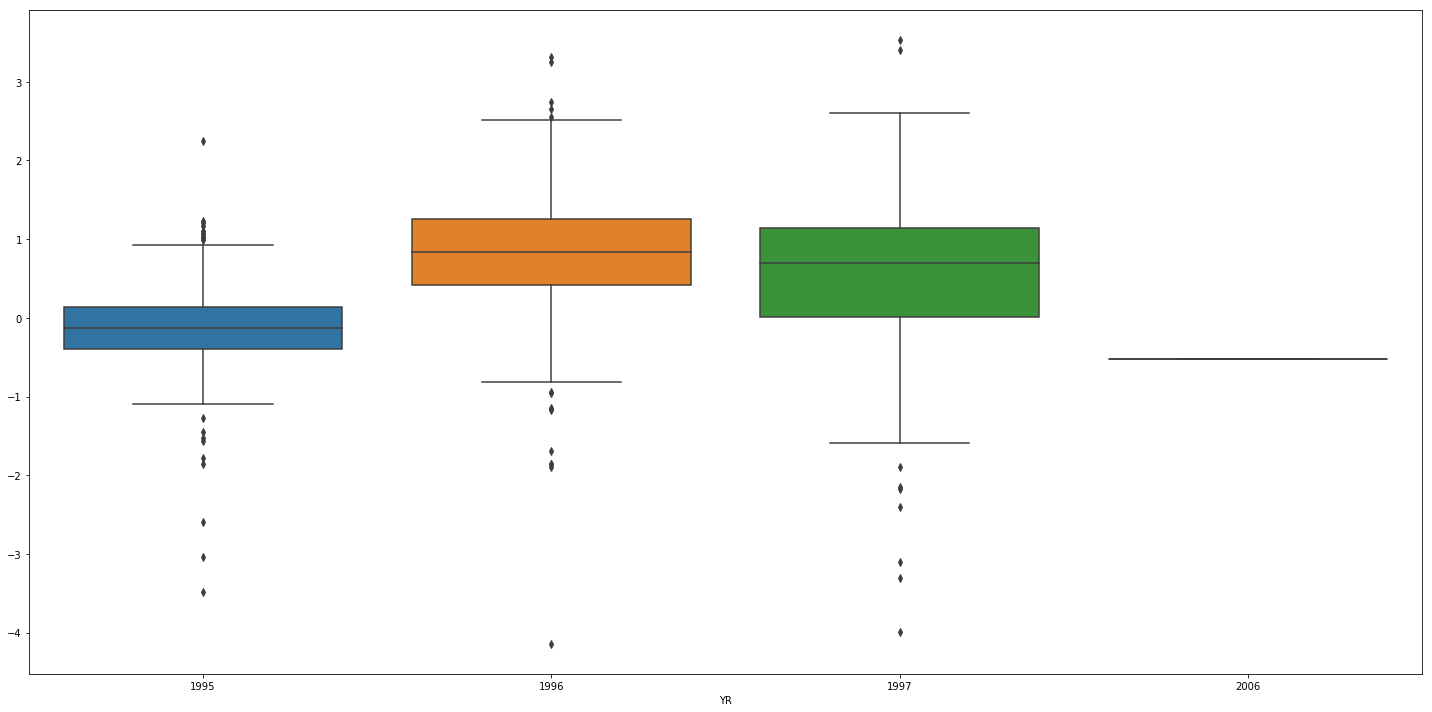

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=unknown.YR, y= unknown.ISST - unknown.OSST)
plt.tight_layout()

For the box plot, outliners mostly below to -1 each year.

### Data use condense inlet measurement method, SI =1

In [31]:
condense_inlet= df[df.SI == 1]

In [32]:
model = ols('ISST ~ OSST', condense_inlet ).fit()
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ISST   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 6.634e+04
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:53:24   Log-Likelihood:                -911.68
No. Observations:                 838   AIC:                             1827.
Df Residuals:                     836   BIC:                             1837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1827      0.093      1.970      0.0

The coefficient of 0.9706 means that as the OSST variable increases by 1, the predicted value of ISST increases by 0.9706.
R-squared is 0.988.

In [33]:
(condense_inlet.ISST-condense_inlet.OSST).describe()

count    838.000000
mean      -0.514690
std        0.744329
min       -7.340000
25%       -0.897500
50%       -0.510000
75%       -0.112500
max        5.000000
dtype: float64

max of differernce is 5, min is -7.34, mean is -0.5146.

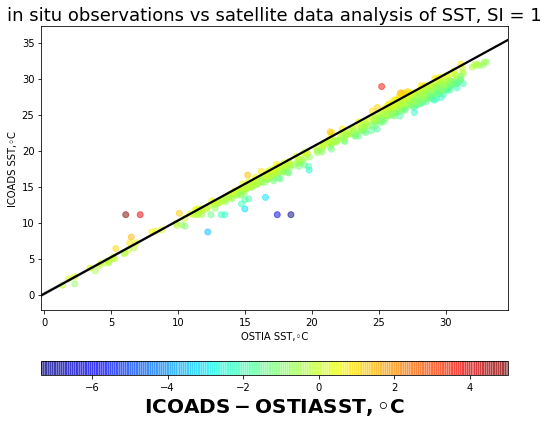

In [34]:
fig = plt.figure(figsize=(8, 6))
point = plt.scatter(condense_inlet.OSST, condense_inlet.ISST, 
            c= condense_inlet.ISST - condense_inlet.OSST, 
            cmap='jet', alpha = 0.5)

sns.regplot(condense_inlet.ISST, condense_inlet.OSST, scatter=False, color='black')

plt.title('in situ observations vs satellite data analysis of SST, SI = 1', size = 18)
plt.xlabel('OSTIA SST,◦C')
plt.ylabel('ICOADS SST,◦C')

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'ICOADS-OSTIA SST,◦C' "}$", size=20)
plt.tight_layout()

Base on the graph shows, most of the observations are below the regression line, with a difference of temperature between 0 to -4.

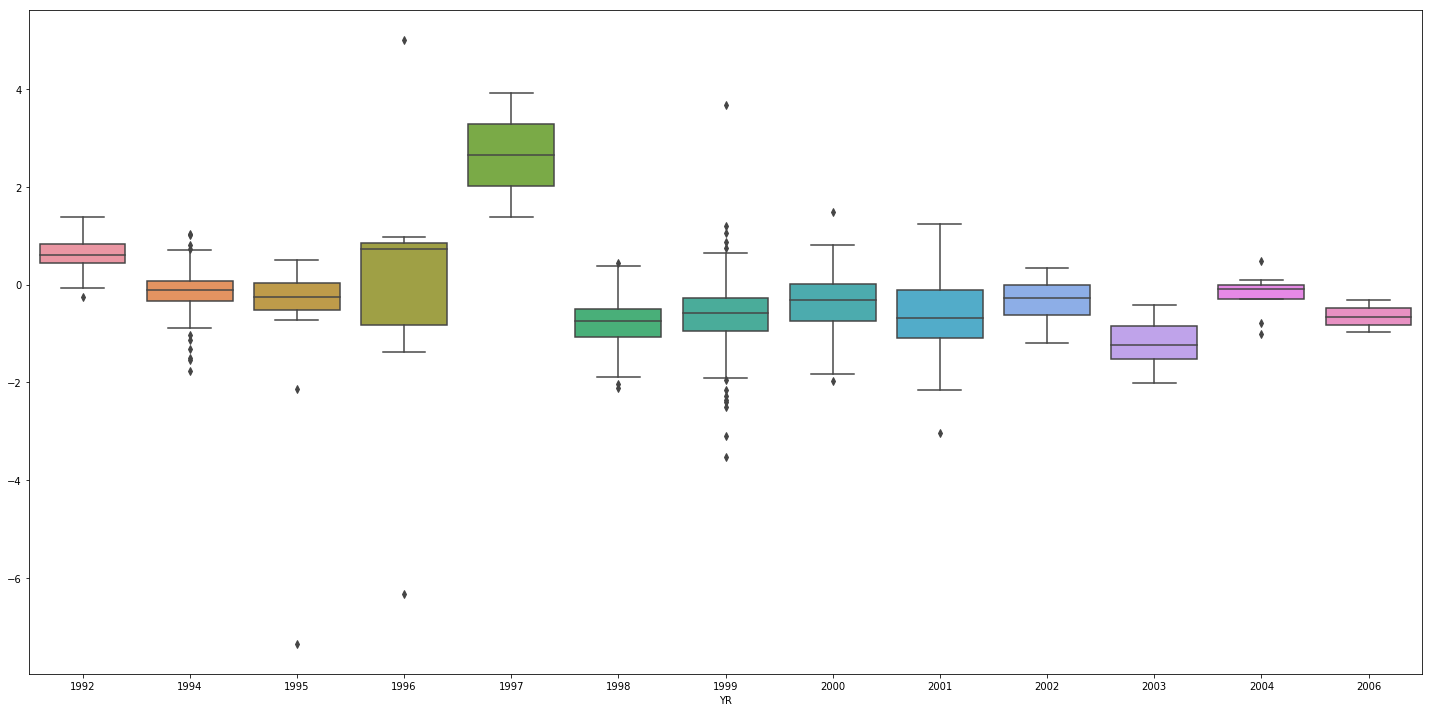

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=condense_inlet.YR, y= condense_inlet.ISST - condense_inlet.OSST)
plt.tight_layout()

Base on the boxplot, 1997 would be one year that has a higher max, min, median values of the difference between ISST - OSST.

### Data use hull contact method, SI = 3

In [36]:
hull_contact= df[df.SI == 3]

In [37]:
model = ols('ISST ~ OSST', hull_contact ).fit()
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ISST   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 4.166e+05
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:53:25   Log-Likelihood:                -6886.0
No. Observations:                5797   AIC:                         1.378e+04
Df Residuals:                    5795   BIC:                         1.379e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0124      0.035      0.351      0.7

The coefficient of 0.9792 means that as the OSST variable increases by 1, the predicted value of ISST increases by 0.9792. R-squared is 0.986.

In [38]:
(hull_contact.ISST-hull_contact.OSST).describe()

count    5797.000000
mean       -0.450883
std         0.806478
min        -8.300000
25%        -0.860000
50%        -0.440000
75%        -0.050000
max         5.000000
dtype: float64

max of differernce is 5, min is -8.30, mean is -0.4509.

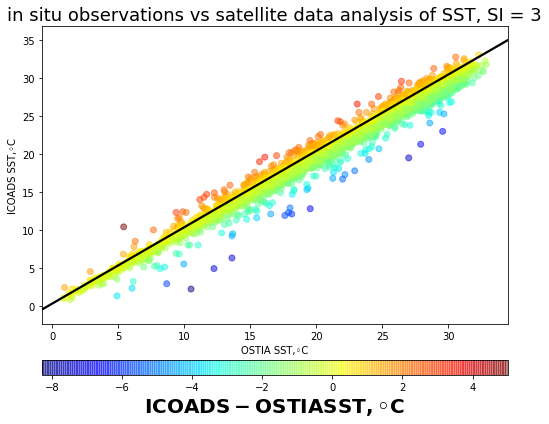

In [39]:
fig = plt.figure(figsize=(8, 6))
point = plt.scatter(hull_contact.OSST, hull_contact.ISST, 
            c= hull_contact.ISST - hull_contact.OSST , 
            cmap='jet', alpha = 0.5)

sns.regplot(hull_contact.ISST, hull_contact.OSST, scatter=False, color='black')

plt.title('in situ observations vs satellite data analysis of SST, SI = 3', size = 18)
plt.xlabel('OSTIA SST,◦C')
plt.ylabel('ICOADS SST,◦C')

m.colorbar(location='bottom', pad = 0.5).set_label(r"$\bf{" 'ICOADS-OSTIA SST,◦C' "}$", size=20)
plt.tight_layout()

It is more similar to the graph with all data.
But observations are more likely below the regression line.

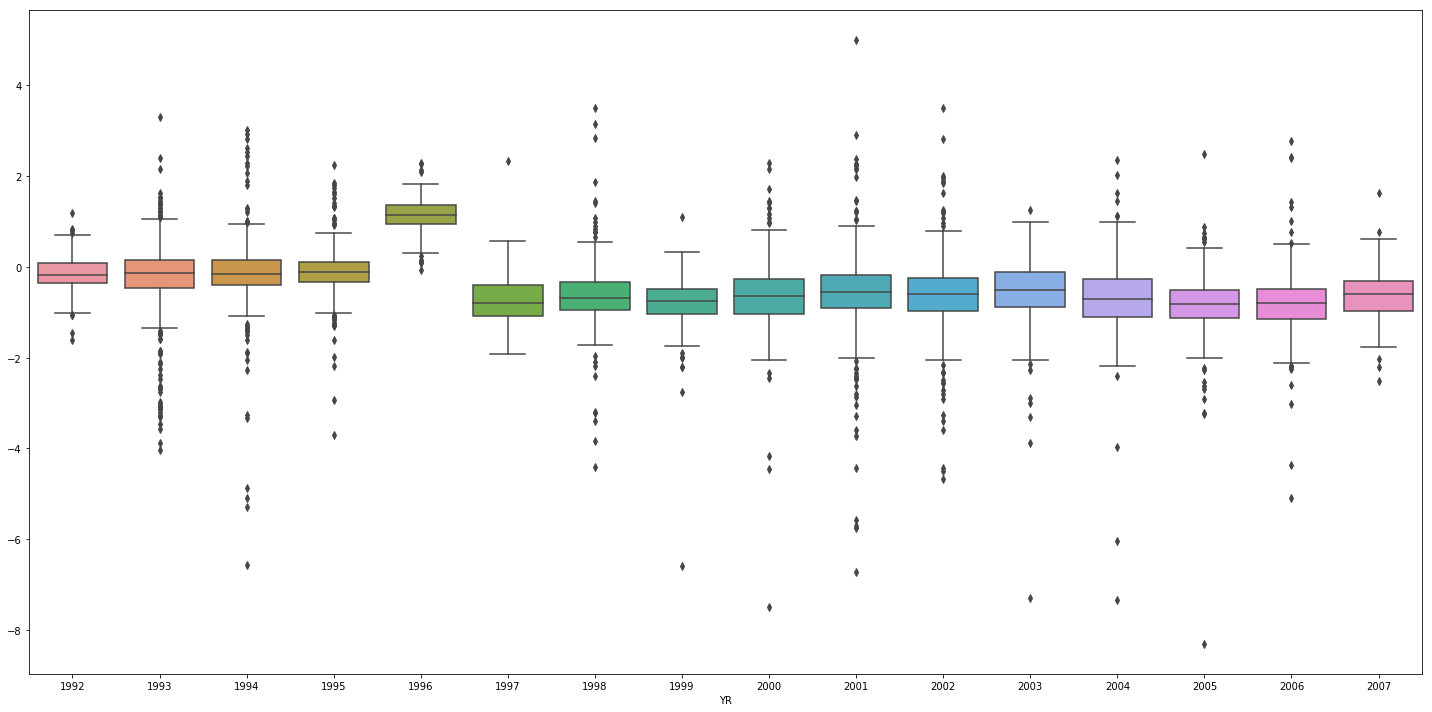

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=hull_contact.YR, y= hull_contact.ISST - hull_contact.OSST)
plt.tight_layout()

For the hull_contact method, the year 1996 become the year with higher max, min, median values of the difference between ISST - OSST.

Base on compute model accuarcy, which is R-squared, 

SI = 1 (condense_inlet) 0.988,

SI = 3 (hull contact method) 0.986,

SI = 0 (unknown) 0.968,

SI = 1 whould be best performance model in this case.

In [41]:
df['SST_ERROR'] = df.ISST-df.OSST

/Users/haonanou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


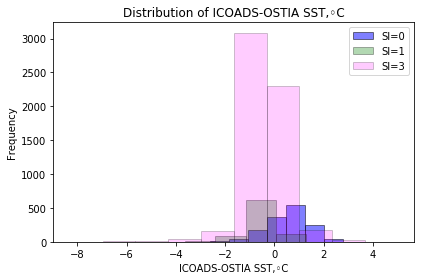

In [42]:
df[df['SI']==0].SST_ERROR.plot(kind='hist', color='blue',edgecolor='black', alpha=0.5)
df[df['SI']==1].SST_ERROR.plot(kind='hist', color='green',edgecolor='black', alpha=0.3)
df[df['SI']==3].SST_ERROR.plot(kind='hist', color='magenta',edgecolor='black', alpha=0.2)
plt.legend(labels=['SI=0', 'SI=1', 'SI=3'])
plt.title('Distribution of ICOADS-OSTIA SST,◦C')
plt.xlabel('ICOADS-OSTIA SST,◦C')
plt.tight_layout()

use the histogram to show the error frequency by each SI. We can see when SI=1, that is smaller error range between -2 to 1.

In [43]:
statistic_SI0=df['SST_ERROR'][df['SI']==0].describe()
statistic_SI0.rename(columns=lambda x:x+'SI0', inplace=True)
statistic_SI1=df['SST_ERROR'][df['SI']==1].describe()
statistic_SI1.rename(columns=lambda x:x+'SI1', inplace=True)
statistic_SI3=df['SST_ERROR'][df['SI']==3].describe()
statistic_SI3.rename(columns=lambda x:x+'SI3', inplace=True)
statistics = pd.concat([statistic_SI0,statistic_SI1, statistic_SI3], axis=1)
statistics.rename(columns={0:'SI0', 1:'SI1', 2:'SI3'}, inplace=True)
statistics

,SI0,SI1,SI3
count,1424.000000,838.000000,5797.000000
mean,0.523462,-0.514690,-0.450883
std,0.867151,0.744329,0.806478
min,-4.140000,-7.340000,-8.300000
25%,-0.030000,-0.897500,-0.860000
50%,0.650000,-0.510000,-0.440000
75%,1.090000,-0.112500,-0.050000
max,3.530000,5.000000,5.000000


Base on the histogram and table above, SI = 1 and SI =3, OSST values are overpredicted.
Since they both have a negative mean of ICOADS-OSTIASST,◦C.
Base on the mean, SI = 3 is produced a small average error than the other methods.

# A drifting buoy (DB)

## Read the data

In [44]:
# DB drifting buoys, floats or drifters, which are freely moved by currents throughout the ocean
DB = pd.read_csv("DB_13947.csv", header = None)

In [45]:
DB.columns = columns_name
DB.head()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
0,2008,10,30,22.23,12.18,336.74,28.1,28.07,0.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,10,30,22.38,12.18,336.74,28.1,28.07,0.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,10,30,22.82,12.18,336.74,28.1,28.07,0.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,10,31,0.02,12.20,336.73,28.0,28.16,0.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,10,31,0.45,12.20,336.73,28.0,28.16,0.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# For buoy platforms (DB and MB) the SI field should be ignored (even if non-empty).
del DB['SI']

In [47]:
# drop null value which whole column is null
DB.dropna(how='all', inplace = True, axis=1)
DB.isnull().sum()

YR        0
MO        0
DY        0
HR        0
LAT       0
LON       0
ISST      0
OSST      0
OERR      0
ICflag    0
dtype: int64

In [48]:
DB.head()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,ICflag
0,2008,10,30,22.23,12.18,336.74,28.1,28.07,0.31,1
1,2008,10,30,22.38,12.18,336.74,28.1,28.07,0.31,1
2,2008,10,30,22.82,12.18,336.74,28.1,28.07,0.31,1
3,2008,10,31,0.02,12.20,336.73,28.0,28.16,0.31,1
4,2008,10,31,0.45,12.20,336.73,28.0,28.16,0.31,1


In [49]:
DB.describe()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,ICflag
count,19837.000000,19837.000000,19837.00000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000
mean,2009.337148,6.517921,15.66013,11.694508,9.839313,330.495286,26.899269,26.989946,0.244963,0.999496
std,0.614864,3.469735,8.80720,6.740517,3.103367,7.525122,2.109318,2.153136,0.048551,0.022447
min,2008.000000,1.000000,1.00000,0.000000,5.220000,313.520000,1.800000,21.290000,0.160000,0.000000
25%,2009.000000,4.000000,8.00000,6.050000,7.520000,325.910000,26.300000,26.230000,0.210000,1.000000
50%,2009.000000,7.000000,16.00000,11.020000,8.870000,331.780000,27.500000,27.470000,0.230000,1.000000
75%,2010.000000,9.000000,23.00000,17.520000,11.360000,335.890000,28.300000,28.620000,0.270000,1.000000
max,2010.000000,12.000000,31.00000,23.980000,17.840000,342.670000,32.100000,30.610000,0.420000,1.000000


In [50]:
DB['YR'].value_counts().sort_index(ascending=True)

2008     1533
2009    10083
2010     8221
Name: YR, dtype: int64

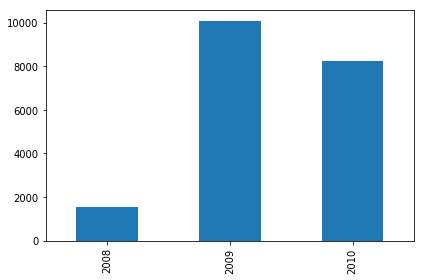

In [51]:
DB['YR'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.tight_layout()

The bar chart shows my data contain the number of observations in 3 years.

## Drifting buoy’s trajectories in different years

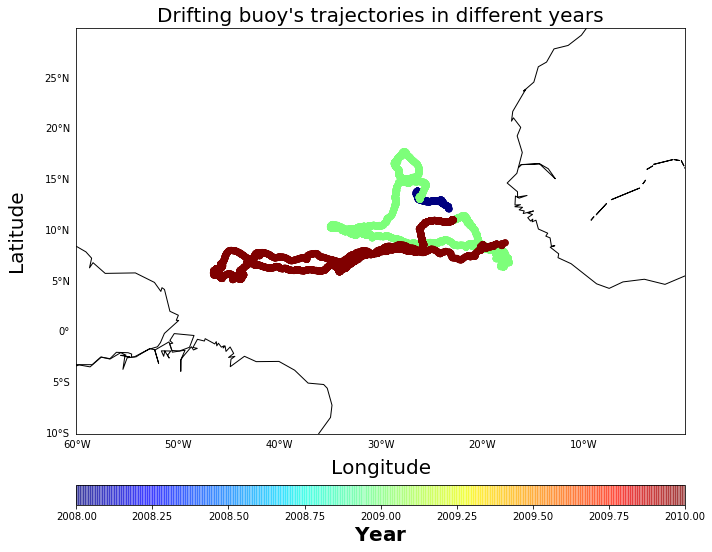

In [52]:
# set figure size
fig = plt.figure(figsize=(10, 15))

# call basemap function, lowest lat, lon and highest lat, lon
m = Basemap(llcrnrlat=-10,urcrnrlat=30, llcrnrlon=300,urcrnrlon=360)

# draw lines
m.drawcoastlines()

# draw scatter plot
m.scatter(DB.LON, DB.LAT, c=DB.YR, cmap='jet', alpha=0.5)

# set up colorbar location, label
m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'Year' "}$", size=20)

# set the x, y labels with linewideth = 0
m.drawparallels(np.arange(-10,30,5),labels=[1,0,0,0], linewidth=0.0)
m.drawmeridians(np.arange(300, 360,10),labels=[0,0,0,1], linewidth=0.0)

plt.title("Drifting buoy's trajectories in different years", size = 20)
plt.xlabel('Longitude', size =20, labelpad=25)
plt.ylabel('Latitude', size = 20, labelpad=50)

plt.tight_layout()

Map the data by long and lat of the Drifting buoy, color indicates calendar years of SST observations.

## SST on DB trajectories

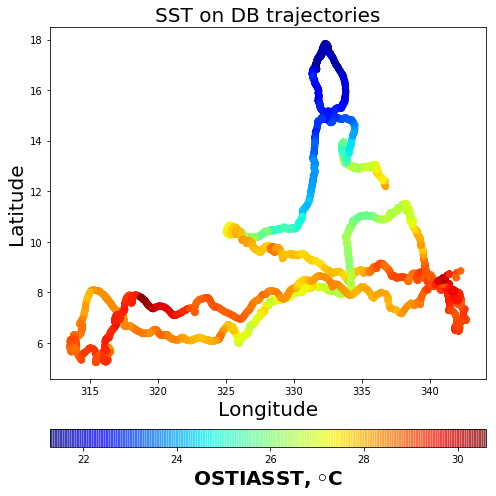

In [53]:
fig = plt.figure(figsize=(7, 7))

plt.scatter(DB.LON, DB.LAT, c=DB.OSST, cmap='jet', alpha=0.5)

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'OSTIA SST,◦C' "}$", size=20)

plt.title("SST on DB trajectories", size = 20)
plt.xlabel('Longitude', size =20)
plt.ylabel('Latitude', size = 20)

plt.tight_layout()

Map the data by long and lat of the Drifting buoy, but for OSTIA SST, ◦C, indicated by color.

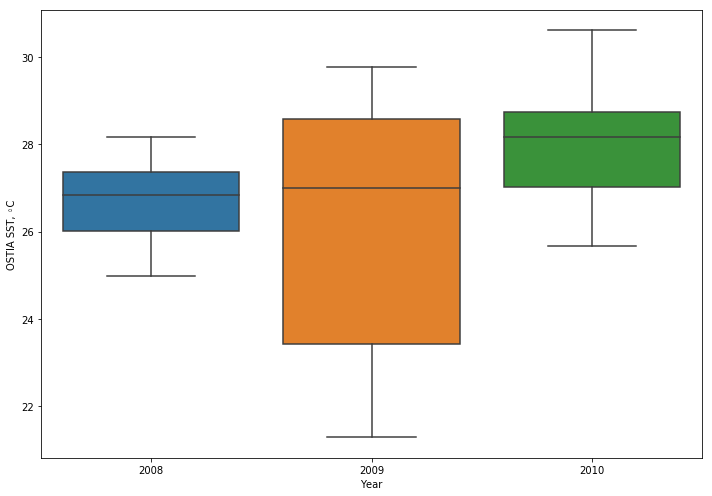

In [54]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(x="YR", y="OSST",data=DB)
plt.ylabel('OSTIA SST, ◦C')
plt.xlabel('Year')
plt.tight_layout()

Create box plot separate data by years, and it can see max, median, min of OSTIA SST for each year. Thie DB data contain no outliers.

## SST error on DB trajectories

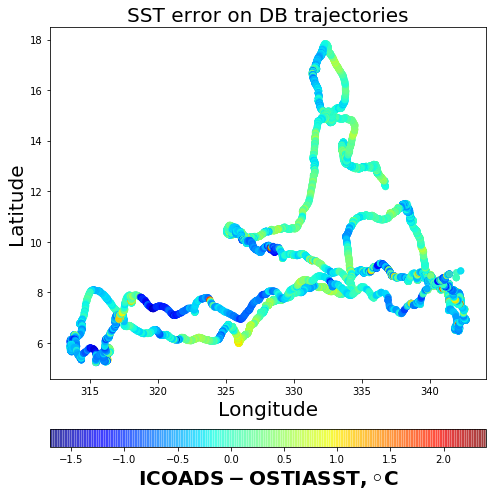

In [55]:
fig = plt.figure(figsize=(7, 7))

plt.scatter(DB.LON[DB.ICflag == 1], DB.LAT[DB.ICflag == 1], c=DB.ISST[DB.ICflag == 1] - DB.OSST[DB.ICflag == 1], cmap='jet', alpha=0.5)

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'ICOADS - OSTIA SST,◦C' "}$", size=20)

plt.title("SST error on DB trajectories", size = 20)
plt.xlabel('Longitude', size =20)
plt.ylabel('Latitude', size = 20)

plt.tight_layout()

Map Data by Difference between ISST AND OSST. The color indicates the difference (in ◦C) between ICOADS SST observations and the OSTIA analyzed SST values for the same days, and where the ICOADS observations were taken. ICOADS SST values should pass its QC, which means ICflag= 1.

## SST observations at different times

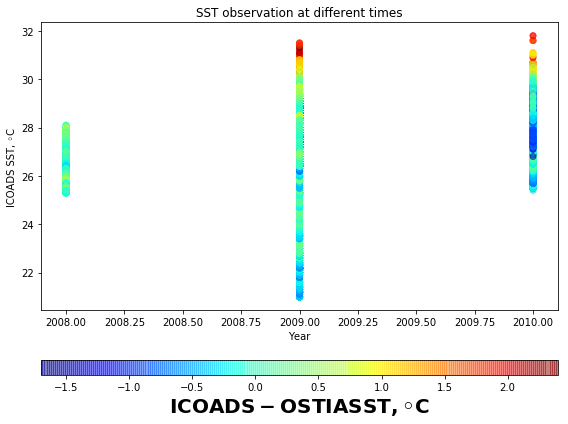

In [56]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(DB.YR[DB.ICflag == 1], DB.ISST[DB.ICflag == 1], 
            c=(DB.ISST[DB.ICflag == 1] - DB.OSST[DB.ICflag == 1]), 
            cmap='jet', alpha = 0.5)
plt.ylabel('ICOADS SST, ◦C')
plt.xlabel('Year')
plt.title('SST observation at different times')

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'ICOADS-OSTIA SST, ◦C' "}$", size=20)
plt.tight_layout()

sactter plot, plot the data point by Year, ISST, to see difference between each year. Color data points by ISST - OSST, and ICflag =1, which means pass quality check.

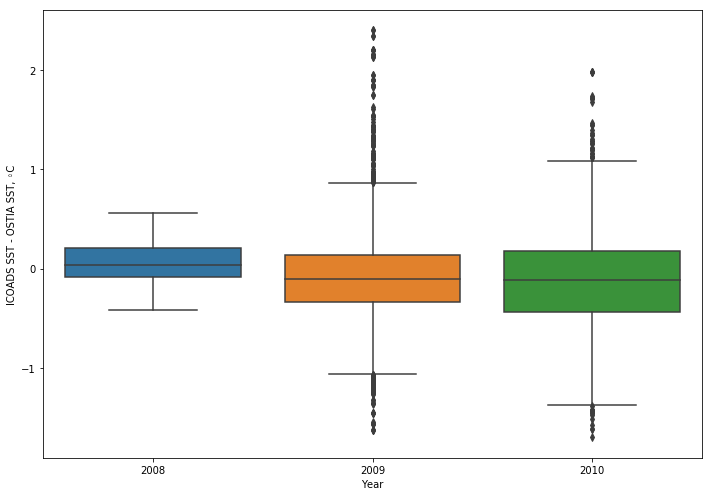

In [57]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(DB.YR[DB.ICflag == 1], DB.ISST[DB.ICflag == 1]-DB.OSST[DB.ICflag == 1])
plt.ylabel('ICOADS SST - OSTIA SST, ◦C')
plt.xlabel('Year')
plt.tight_layout()

On the boxplot, we can see the Year 2010 contain high mean, max, and min compare to the other years.

In [58]:
# filter DB data with ICflag = 1
df=DB[DB.ICflag == 1]

In [59]:
df['SST_ERROR'] = df.ISST-df.OSST

/Users/haonanou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df.head()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,ICflag,SST_ERROR
0,2008,10,30,22.23,12.18,336.74,28.1,28.07,0.31,1,0.03
1,2008,10,30,22.38,12.18,336.74,28.1,28.07,0.31,1,0.03
2,2008,10,30,22.82,12.18,336.74,28.1,28.07,0.31,1,0.03
3,2008,10,31,0.02,12.20,336.73,28.0,28.16,0.31,1,-0.16
4,2008,10,31,0.45,12.20,336.73,28.0,28.16,0.31,1,-0.16


In [61]:
statistic2008=df['SST_ERROR'][df['YR']==2008].describe()
statistic2008.rename(columns=lambda x:x+'2008', inplace=True)
statistic2009=df['SST_ERROR'][df['YR']==2009].describe()
statistic2009.rename(columns=lambda x:x+'2009', inplace=True)
statistic2010=df['SST_ERROR'][df['YR']==2010].describe()
statistic2010.rename(columns=lambda x:x+'2010', inplace=True)
statistics = pd.concat([statistic_SI0,statistic_SI1, statistic_SI3], axis=1)
statistics.rename(columns={0:'2008', 1:'2009', 2:'2010'}, inplace=True)
statistics

,2008,2009,2010
count,1424.000000,838.000000,5797.000000
mean,0.523462,-0.514690,-0.450883
std,0.867151,0.744329,0.806478
min,-4.140000,-7.340000,-8.300000
25%,-0.030000,-0.897500,-0.860000
50%,0.650000,-0.510000,-0.440000
75%,1.090000,-0.112500,-0.050000
max,3.530000,5.000000,5.000000


Base on the boxplot and tables above, YR =2009 and YR=2010, OSST values are overpredicted. Since they both have a negative mean of ICOADS-OSTIASST,◦C. Base on the mean, YR = 2008 is produced a large average error than the other methods.

## in situ observations vs satellite data analysis of SST

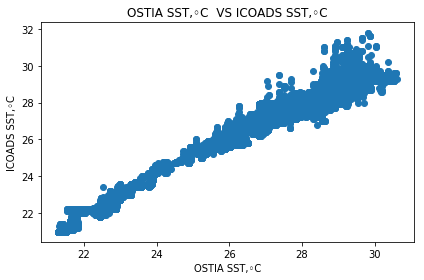

In [62]:
plt.scatter(df['OSST'], df['ISST'])
plt.xlabel('OSTIA SST,◦C')
plt.ylabel('ICOADS SST,◦C')
plt.title('OSTIA SST,◦C  VS ICOADS SST,◦C')
plt.tight_layout()

Scatter plot show OSST and ISST with a positive relationship.

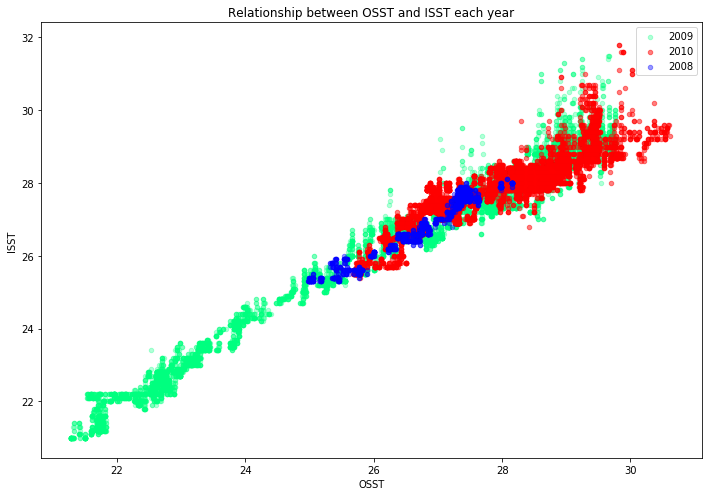

In [63]:
ax1 = df[df['YR']== 2009].plot(kind='scatter',  x='OSST', y='ISST', 
                         color='springgreen', alpha=0.3, figsize=(10,7))
df[df['YR']== 2010].plot(kind='scatter',  x='OSST', y='ISST', 
                         color='r', alpha=0.5, figsize=(10,7),ax=ax1)
df[df['YR']== 2008].plot(kind='scatter', x='OSST', y='ISST', 
                               color='blue', alpha=0.4, figsize=(10,7), ax=ax1)
plt.title('Relationship between OSST and ISST each year')
plt.legend(labels=['2009', '2010', '2008'])
plt.tight_layout()

Base on the scatter plot, we can see the temperature distribution of each year.

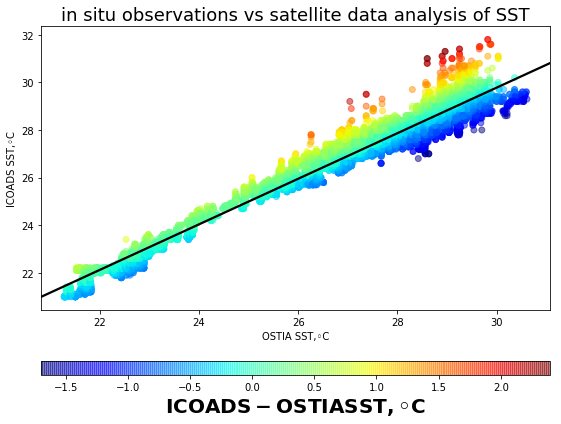

In [64]:
fig = plt.figure(figsize=(8, 6))
point = plt.scatter(df.OSST, df.ISST, 
            c=(df.ISST - df.OSST), 
            cmap='jet', alpha = 0.5)

sns.regplot(df.OSST, df.ISST,
            data=df, scatter=False, color='black')

plt.title('in situ observations vs satellite data analysis of SST', size = 18)
plt.xlabel('OSTIA SST,◦C')
plt.ylabel('ICOADS SST,◦C')

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'ICOADS-OSTIA SST,◦C' "}$", size=20)
plt.tight_layout()

The error below the line, range mostly is between 0 to -1.5.

In [65]:
model = ols('ISST ~ OSST', df ).fit()
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ISST   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 5.240e+05
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:53:38   Log-Likelihood:                -10013.
No. Observations:               19827   AIC:                         2.003e+04
Df Residuals:                   19825   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0591      0.036     29.574      0.0

R-squared is 0.964, and the model fit almost perfectly, it could lead to overfiting.

In [66]:
# filter data out by Year
DB2008 = df[df['YR'] == 2008]
DB2009 = df[df['YR'] == 2009]
DB2010 = df[df['YR'] == 2010]

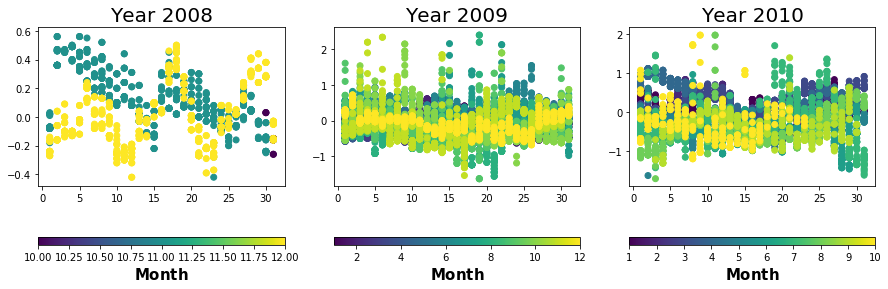

In [67]:
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 3, 1)
plt.scatter(DB2008.DY, DB2008.ISST-DB2008.OSST, c= DB2008.MO)
plt.title('Year 2008', size=20)
m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'Month' "}$", size=15)

fig.add_subplot(1, 3, 2)
plt.scatter(DB2009.DY, DB2009.ISST-DB2009.OSST, c= DB2009.MO)
plt.title('Year 2009', size=20)
m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'Month' "}$", size=15)

fig.add_subplot(1, 3, 3)
plt.title('Year 2010', size=20)
plt.scatter(DB2010.DY, DB2010.ISST-DB2010.OSST, 
            c= DB2010.MO)
m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'Month' "}$", size=15)

Make visualization of  ICOADS-OSTIA SST,◦C on different days in each year. the color indicates Month. As we see in the Year 2008, error range only between -0.4 to 0.6, which is highly small than the other two years.

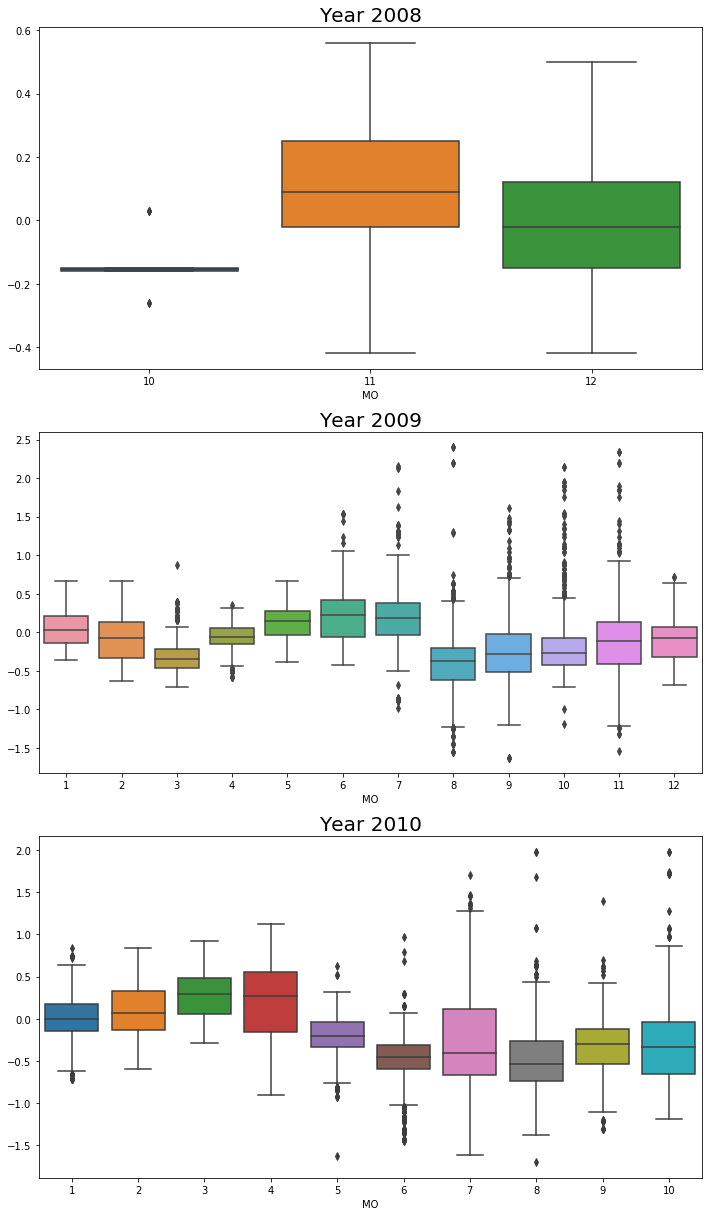

In [68]:
fig = plt.figure(figsize=(10, 17))
fig.add_subplot(3, 1, 1)
sns.boxplot(DB2008.MO, DB2008.ISST-DB2008.OSST)
plt.title('Year 2008', size=20)

fig.add_subplot(3, 1, 2)
sns.boxplot(DB2009.MO, DB2009.ISST-DB2009.OSST)
plt.title('Year 2009', size=20)

fig.add_subplot(3, 1, 3)
sns.boxplot(DB2010.MO, DB2010.ISST-DB2010.OSST)
plt.title('Year 2010', size=20)
plt.tight_layout()

Boxplot explained the max, min, median of ICOADS-OSTIA SST,◦C on different months in each year. 

# A moored buoy (MB)

## Read the data

In [69]:
# MB moored buos, which cannot move, fixed in place at a set of locations in the ocean.
MB = pd.read_csv("MB_62415.csv", header = None)

In [70]:
MB.columns = columns_name
MB.head()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
0,1991,11,18,15,51.9,3.6,10.3,10.26,0.37,NaN,...,0,0,210.0,8.7,998.9,9.5,NaN,8.9,NaN,NaN
1,1991,11,18,18,51.9,3.6,10.2,10.26,0.37,NaN,...,0,0,190.0,7.2,998.7,8.7,NaN,8.6,NaN,NaN
2,1991,11,19,1,51.9,3.6,10.4,9.68,0.32,NaN,...,0,0,150.0,6.7,998.9,8.6,NaN,8.5,NaN,NaN
3,1991,11,19,3,51.9,3.6,10.7,9.68,0.32,NaN,...,0,0,120.0,7.2,999.0,8.5,NaN,8.4,NaN,NaN
4,1991,11,19,9,51.9,3.6,10.2,9.68,0.32,NaN,...,0,0,70.0,11.8,1001.9,7.5,NaN,7.4,NaN,NaN


In [71]:
# For buoy platforms (DB and MB) the SI field should be ignored (even if non-empty).
del MB['SI']

In [72]:
# drop null value which whole column is null
MB.dropna(how='all', inplace = True, axis=1)
MB.isnull().sum()

YR           0
MO           0
DY           0
HR           0
LAT          0
LON          0
ISST         0
OSST         1
OERR         1
ICflag       0
DS           0
VS           0
WDIR        97
WSPD        97
SLP          8
AT          62
WBT       6125
DPT        530
CLT       9170
dtype: int64

In [73]:
MB.head()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,ICflag,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT
0,1991,11,18,15,51.9,3.6,10.3,10.26,0.37,1,0,0,210.0,8.7,998.9,9.5,NaN,8.9,NaN
1,1991,11,18,18,51.9,3.6,10.2,10.26,0.37,1,0,0,190.0,7.2,998.7,8.7,NaN,8.6,NaN
2,1991,11,19,1,51.9,3.6,10.4,9.68,0.32,1,0,0,150.0,6.7,998.9,8.6,NaN,8.5,NaN
3,1991,11,19,3,51.9,3.6,10.7,9.68,0.32,1,0,0,120.0,7.2,999.0,8.5,NaN,8.4,NaN
4,1991,11,19,9,51.9,3.6,10.2,9.68,0.32,1,0,0,70.0,11.8,1001.9,7.5,NaN,7.4,NaN


In [74]:
MB.describe()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,ICflag,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT
count,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9171.000000,9171.000000,9172.000000,9172.0,9172.0,9075.000000,9075.000000,9164.000000,9110.000000,3047.000000,8642.000000,2.000000
mean,1994.090711,6.099215,15.726995,10.534780,51.832894,3.600011,10.952246,10.817487,0.383628,0.998583,0.0,0.0,191.508430,8.026678,1015.423560,10.081866,9.366131,6.548600,7.000000
std,1.323505,3.493966,8.787577,6.893981,1.876883,0.022028,5.021964,5.069036,0.111653,0.037623,0.0,0.0,100.918434,3.747605,10.123573,5.667887,4.852121,5.633709,2.828427
min,1991.000000,1.000000,1.000000,0.000000,0.000000,2.000000,-1.000000,2.230000,0.200000,0.000000,0.0,0.0,10.000000,0.000000,975.600000,-8.500000,-2.000000,-13.700000,5.000000
25%,1993.000000,3.000000,8.000000,4.000000,51.900000,3.600000,6.800000,6.530000,0.290000,1.000000,0.0,0.0,100.000000,5.100000,1009.400000,6.100000,5.500000,2.700000,6.000000
50%,1994.000000,6.000000,16.000000,10.000000,51.900000,3.600000,9.900000,9.720000,0.360000,1.000000,0.0,0.0,210.000000,7.700000,1016.400000,9.400000,8.700000,6.500000,7.000000
75%,1995.000000,9.000000,23.000000,16.000000,51.900000,3.600000,15.300000,15.250000,0.450000,1.000000,0.0,0.0,260.000000,10.300000,1022.000000,14.600000,13.100000,10.600000,8.000000
max,1996.000000,12.000000,31.000000,23.000000,56.300000,4.600000,21.000000,28.810000,0.820000,1.000000,0.0,0.0,362.000000,24.700000,1043.900000,32.700000,21.900000,31.000000,9.000000


In [75]:
MB['YR'].value_counts().sort_index(ascending=True) 

1991      63
1992    1538
1993    1293
1994    2257
1995    2652
1996    1369
Name: YR, dtype: int64

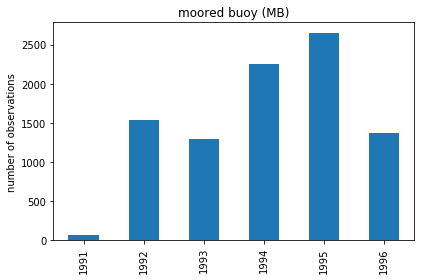

In [76]:
MB['YR'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title('moored buoy (MB)')
plt.ylabel('number of observations')
plt.tight_layout()

The bar chart shows my data contain the number of observations in 6 years.

## Moored buoy in different years

In [77]:
# Filter data with ICflag == 1
MB = MB[MB.ICflag == 1]

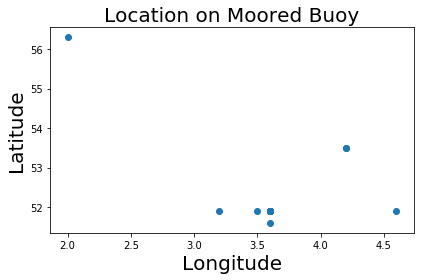

In [78]:
plt.scatter(MB.LON, MB.LAT)
plt.title("Location on Moored Buoy", size = 20)
plt.xlabel('Longitude', size =20)
plt.ylabel('Latitude', size = 20)
plt.tight_layout()

Since this platform does not move, geographical view of its data is not very informative.

In [79]:
MB.groupby(['LAT', 'LON']).size()

LAT   LON
51.6  3.6       1
51.9  3.2       1
      3.5       1
      3.6    9152
      4.6       1
53.5  4.2       2
56.3  2.0       1
dtype: int64

My data contain 7 location for MB platform.Other location just with one or two simple, so I just foucus on the (lON, LAT) which is (3.6, 51.9)

In [80]:
MB = MB[(MB['LAT'] == 51.9) & (MB['LON'] == 3.6)]

In [81]:
MB.groupby(['LON', 'LAT']).size()

LON  LAT 
3.6  51.9    9152
dtype: int64

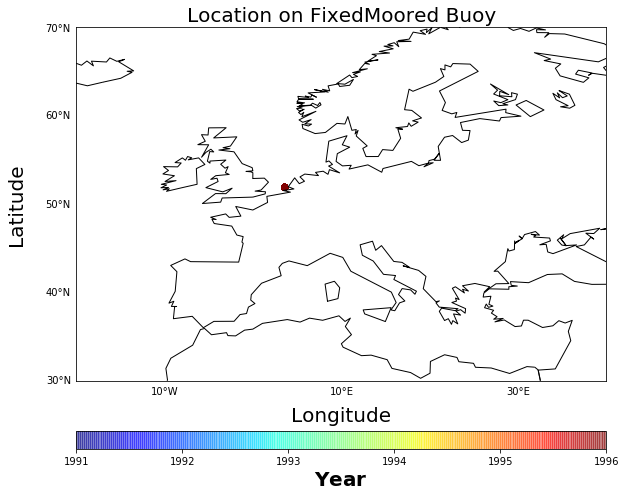

In [82]:
# set figure size
fig = plt.figure(figsize=(10, 7))

# call basemap function, lowest lat, lon and highest lat, lon
m = Basemap(llcrnrlat=30,urcrnrlat=70, llcrnrlon=-20,urcrnrlon=40)

# draw lines
m.drawcoastlines()

# draw scatter plot
m.scatter(MB.LON, MB.LAT, c=MB.YR, cmap='jet', alpha=0.5)

# set up colorbar location, label
m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'Year' "}$", size=20)

# set the x, y labels with linewideth = 0
m.drawparallels(np.arange(-50,90,10),labels=[1,0,0,0], linewidth=0.0)
m.drawmeridians(np.arange(-10, 370,20),labels=[0,0,0,1], linewidth=0.0)

plt.title("Location on FixedMoored Buoy", size = 20)
plt.xlabel('Longitude', size =20, labelpad=25)
plt.ylabel('Latitude', size = 20, labelpad=50)

plt.tight_layout()

Map the data with LON = 3.6, LAT = 51.9

In [83]:
MB['time'] = pd.to_datetime({'Year': MB.YR,'Month': MB.MO,'day': MB.DY})

## SST observations at MB at different times

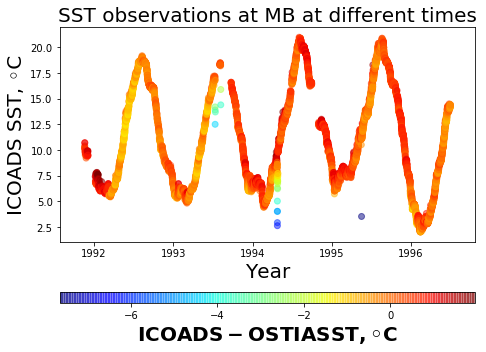

In [84]:
fig = plt.figure(figsize=(7, 5))

plt.scatter(MB.time, MB.ISST, c=MB.ISST - MB.OSST, cmap='jet', alpha=0.5)

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'ICOADS - OSTIA SST,◦C' "}$", size=20)

plt.title("SST observations at MB at different times", size = 20)
plt.xlabel('Year', size =20)
plt.ylabel('ICOADS SST, ◦C', size = 20)

plt.tight_layout()

Show the movement of error between each year. The year 1993 to 1994 and Year 1994 to 1995 contain most outliers base on the graph.

Text(0.5,0,'Year')

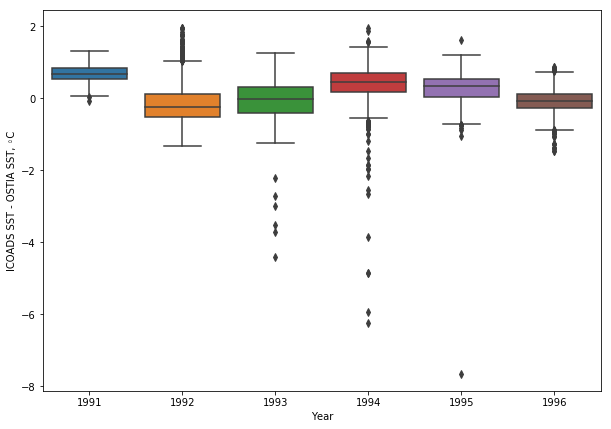

In [85]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(MB.YR, MB.ISST-MB.OSST)
plt.ylabel('ICOADS SST - OSTIA SST, ◦C')
plt.xlabel('Year')

Give a box plot, to take clear look the graph explain by sactter plot.

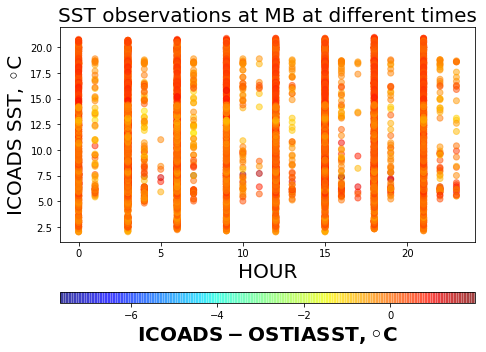

In [86]:
fig = plt.figure(figsize=(7, 5))

plt.scatter(MB.HR, MB.ISST, c=MB.ISST - MB.OSST, cmap='jet', alpha=0.5)

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'ICOADS - OSTIA SST,◦C' "}$", size=20)

plt.title("SST observations at MB at different times", size = 20)
plt.xlabel('HOUR', size =20)
plt.ylabel('ICOADS SST, ◦C', size = 20)

plt.tight_layout()

use scatter plot the data of Hour vs ISST, use color indicates ISST - OSST, the range is mostly between -2 to 0.

## in situ observations vs satellite data analysis of SST

Text(0,0.5,'ICOADS SST,◦C')

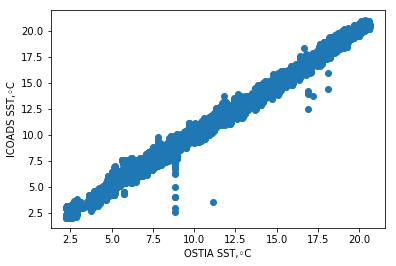

In [87]:
plt.scatter(MB['OSST'], MB['ISST'])
plt.xlabel('OSTIA SST,◦C')
plt.ylabel('ICOADS SST,◦C')

Show the positive corrlation bwteen OSST and ISST, with some oultiler between 7.5 to 10 ◦C and 16 to 18◦C.

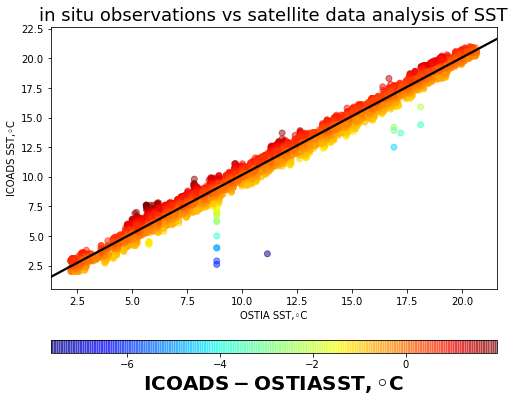

In [88]:
fig = plt.figure(figsize=(8, 6))
point = plt.scatter(MB.OSST, MB.ISST, 
            c=(MB.ISST - MB.OSST), 
            cmap='jet', alpha = 0.5)

sns.regplot(MB.OSST, MB.ISST, data=MB, scatter=False, color='black')

plt.title('in situ observations vs satellite data analysis of SST', size = 18)
plt.xlabel('OSTIA SST,◦C')
plt.ylabel('ICOADS SST,◦C')

m.colorbar(location='bottom', pad = 0.7).set_label(r"$\bf{" 'ICOADS-OSTIA SST,◦C' "}$", size=20)

In MB data, difference of ICOADS-OSTIA SST,◦C is mostly between -1 to 2.

In [89]:
df = MB
model = ols('ISST ~ OSST', df ).fit()
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ISST   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 8.426e+05
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:53:45   Log-Likelihood:                -7011.7
No. Observations:                9152   AIC:                         1.403e+04
Df Residuals:                    9150   BIC:                         1.404e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2449      0.013     19.025      0.0

accuracy of the model is 0.989

## Two-sample Z test

In [90]:
SH.MO.unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7])

In [91]:
DB.MO.unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

HO: ramdon pick sample, the  mean of ICOADS-OSTIA SST,◦C in month 7 is same

HA: the mean of ICOADS-OSTIA SST,◦C in month 7 is different

In [92]:
import scipy
from scipy import stats

In [93]:
df1 = SH.ISST[(SH.ICflag == 1) & (SH.MO ==7)]-SH.OSST[(SH.ICflag == 1) &(SH.MO ==7)]
df2 = DB.ISST[(DB.ICflag == 1) & (DB.MO ==7)]-DB.OSST[(DB.ICflag == 1) &(DB.MO ==7)]

In [94]:
np.random.seed(123)

In [95]:
df1.shape

(565,)

In [96]:
df2.shape

(1783,)

In [97]:
# random selected sample 200
rvs1 = df1.sample(n=200)
rvs2 = df2.sample(n=200)

In [98]:
scipy.stats.ttest_rel(rvs1, rvs2, axis=0)

Ttest_relResult(statistic=-3.420683360042103, pvalue=0.0007579049255025727)

Since P-value is samll than 0.05, we reject the null hypothesis test.